# Part II - Ford GoBike System Data
## by Yasmin Madjitey

## Investigation Overview


>  In this data exploration project, I decided to go with the Ford GoBike System because I find the bike-sharing system in general, interesting. It is an opportunity to look at the state of the system in general using the provided dataset as an example. I looked at what could influence the bike-sharing system. Could it be distance, time, or user type? As in when are most trips taken in terms of time of day or day of the week? How long does a trip take? Does the above depend on if a user is a subscriber or customer?

> Using univariate, bivariate and multivariate exploration, I looked at the cases mentioned above in detail.

## Dataset Overview

> The dataset consists of 183,412 entries in the dataset with 16 original columns/attributes in relation to individual rides made in the bike-sharing system. However, for better understanding, I extracted the days in which the service was started and ended into new columns. Some of the features include the duration of the ride, user type, members birth year, etc. The dataset covers entries for the month of February.
> Due some quality issues and inconsistencies in the dataset, the dataset was cleaned for analysis. The appropriate data types were assigned, inconsistent values were handled and new columns such as a distance column, calculated based on the provided latitude and longitude, was added to the dataset. The final dataset consists of more object variables than numeric ones.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import datetime
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
go_bike = pd.read_csv('gobike.csv')

#define : change the dtypes to the appropriate form
## code :     
go_bike.start_time =   pd.to_datetime(go_bike.start_time)           
go_bike.end_time = pd.to_datetime(go_bike.end_time)                 
go_bike.start_station_id =  go_bike.start_station_id.astype(str)      
go_bike.start_station_name  = go_bike.start_station_name.astype(str)         
go_bike.end_station_id = go_bike.end_station_id.astype(str)         
go_bike.end_station_name = go_bike.end_station_name.astype(str)               
go_bike.bike_id = go_bike.bike_id.astype(str)                
go_bike.member_gender =  go_bike.member_gender.astype('category')     
go_bike.bike_share_for_all_trip =  go_bike.bike_share_for_all_trip.astype('category')  
go_bike.member_birth_year =  go_bike.member_birth_year.astype(str)

#to remove the '.0' at the end
go_bike.start_station_id = [s.rstrip(".0") for s in go_bike.start_station_id.values]
go_bike.end_station_id = [s.rstrip(".0") for s in go_bike.end_station_id.values]
go_bike.member_birth_year = [s.rstrip(".0") for s in go_bike.member_birth_year.values]

#to extract the start and end hours as well as days and save the values into new columns
go_bike['start_day'] = go_bike.start_time.dt.weekday_name
go_bike['end_day'] = go_bike.end_time.dt.weekday_name
go_bike['start_hour'] = go_bike['start_time'].dt.hour
go_bike['end_hour'] = go_bike['end_time'].dt.hour

go_bike['end_hour'] = go_bike['end_hour'].astype(str)
go_bike['start_hour'] = go_bike['start_hour'].astype(str)

In [3]:
#Part of my exploration is to look at the distance covered by trips. Given the latitude and Longitude, 
#I can calculate the distance in kilometres using the geopy library. 
#Run pip install geopy in the workspace terminal to install the librabry. 
#I used this library to get the distance between the coordinates.

#Note: this takes quite some time to load

#adding distance to my dataset
import geopy
from geopy import distance
go_bike['trip_km'] = go_bike[['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 
                        'end_station_longitude']].apply(lambda x: distance.distance((x[0],x[1]), (x[2],x[3])).km, axis=1)

In [4]:
#first change ordinal objects to the appropriate form
var_dict = {'user_type': ['Customer', 'Subscriber'],
            'start_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            'end_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
             'bike_share_for_all_trip': ['No', 'Yes'],
             'start_hour': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
                            '18', '19', '20', '21', '22', '23'],
             'end_hour': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
                            '18', '19', '20', '21', '22', '23']}
for v in var_dict:
    ordered_v = pd.api.types.CategoricalDtype(ordered = True, categories= var_dict[v])
    go_bike[v] = go_bike[v].astype(ordered_v)

In [5]:
def cuberoot_trans(x, inverse = False):
    """ function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

In [6]:
go_bike['distance_km'] = go_bike['trip_km'].apply(cuberoot_trans)

#plotting a distribution of trip duration
go_bike['duration_hour'] = [s/3600 for s in go_bike.duration_sec]
go_bike['duration_hour'] = go_bike['duration_hour'].apply(cuberoot_trans)

## (Visualization 1)

> When are most trips taken in terms of time of day or day of the week?

The distributions above show that trips occured within a 24 hour time frame. Both diagrams for start and end days look the same with the most trips ocurring on Thursdays. Also, most trips start from 8:00 and 17:00 and most trips end around the same hour.
 

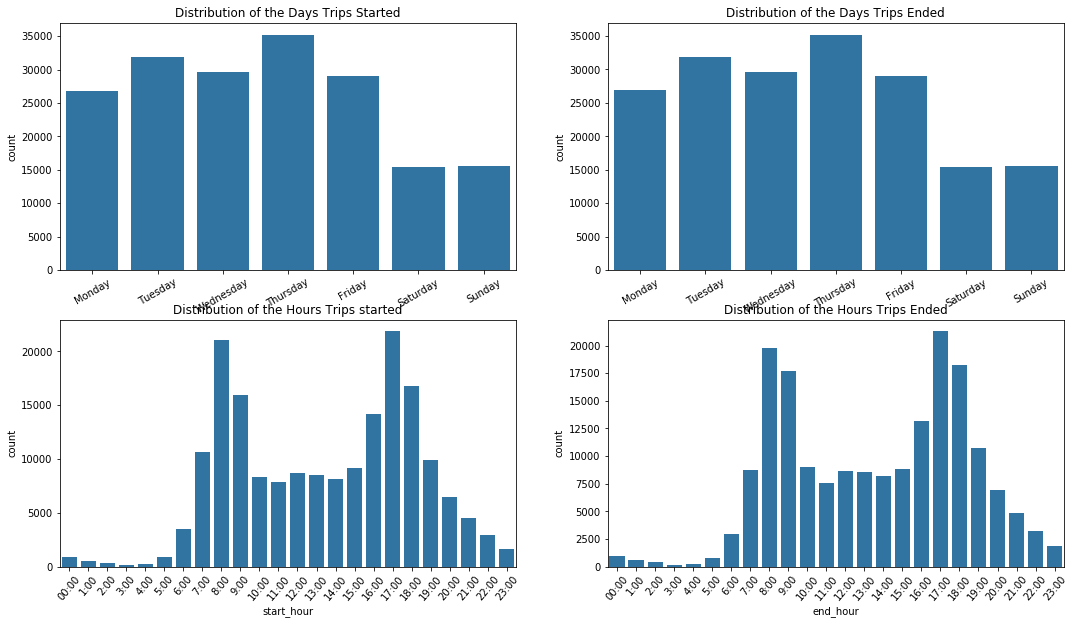

In [7]:
plt.figure(figsize = [18, 10])
color = sb.color_palette()[0]
plt.subplot(2, 2, 1)
sb.countplot(go_bike.start_day, color = color);
plt.xticks(rotation = 30)
plt.title('Distribution of the Days Trips Started');

plt.subplot(2, 2, 2)
sb.countplot(go_bike.end_day, color = color);
plt.xticks(rotation = 30)
plt.title('Distribution of the Days Trips Ended');

plt.subplot(2, 2, 3)
sb.countplot(go_bike.start_hour, color = color)
#setting customized ticklabels for x axis
labs = ['00:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00',
       '12:00', '13:00', '14:00', '15:00', '16:00', '17:00','18:00', '19:00', '20:00', '21:00', '22:00', '23:00'] 
plt.xticks(range(24), labs, rotation = 50)
plt.title('Distribution of the Hours Trips started');

plt.subplot(2, 2, 4)
sb.countplot(go_bike.end_hour, color = color)
#setting customized ticklabels for x axis
labs = ['00:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00',
       '12:00', '13:00', '14:00', '15:00', '16:00', '17:00','18:00', '19:00', '20:00', '21:00', '22:00', '23:00'] 
plt.xticks(range(24), labs, rotation = 50)
plt.title('Distribution of the Hours Trips Ended');

## (Visualization 2)

> How long does a trip take?

> In this section, I investigated the relationships between pairs of the above mentioned variables in the data. Visualizing the relationship between the duration and distance covered, one would expect the distance covered by a trip to be in tune with the duration. The bulk of the data sat around 0-10 hours and 0-20 km. It can also be seen that, an increase in the trip duration does not neccessarily corespond with an increase in distance covered. This could be as a result of stops or pauses taken by the individual rider.

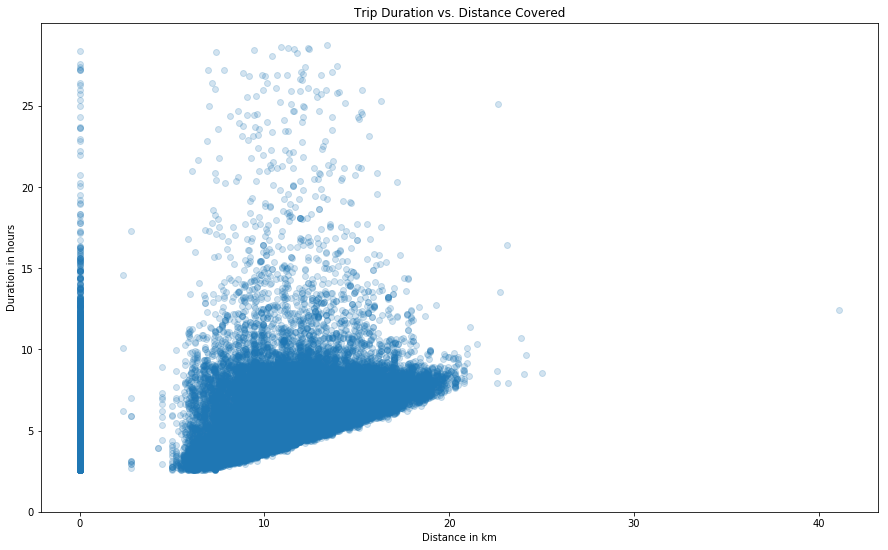

In [8]:
#to visualize the relationship between duration and distance
plt.subplots(figsize = (15, 9))

plt.scatter(go_bike['distance_km'], go_bike['duration_hour'], alpha = 1/5)

plt.title('Trip Duration vs. Distance Covered')
plt.ylabel("Duration in hours")
plt.xlabel('Distance in km');

labs = ['0', '10','20', '30', '40']
plt.xticks(np.arange(0, 4+1, 1), labs)

labels = ['0','5', '10', '15', '20', '25', '30']
plt.yticks(np.arange(0, 3, 0.5), labels);

## (Visualization 3)

>  Does the trip distance and duration depend on if a user is a subscriber or customer?

> In a plot looking at the relationship between user types, distance covered and duration, points for customers tend be smaller than for subscribers.Plotting this relationship on each level of user type, ie. customer and subscriber, there doesn't seem to a difference in their relationship between distance and duration. Which is to say that, distance covered or the trip's duration doesn't really depend on the type of user, be it a customer or a subscriber.

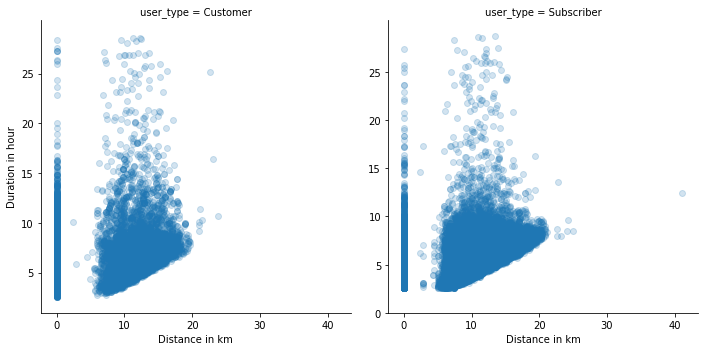

In [9]:
# to create a faceted plot on levels of the user_type variable
g = sb.FacetGrid(data = go_bike, col = 'user_type', size = 5)
g.map(plt.scatter, 'distance_km', 'duration_hour', alpha = 1/5)
g.set_xlabels('Distance in km')
g.set_ylabels('Duration in hour')
labels = ['0','5', '10', '15', '20', '25', '30']
plt.yticks(np.arange(0, 3, 0.5), labels)
labs = ['0', '10','20', '30', '40']
plt.xticks(np.arange(0, 4+1, 1), labs);

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 522368 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/